In [1]:
#!/usr/bin/env python3

In [2]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np 
import math
from glob import glob
import os
from Data import DataContainer, Data
import random
import joblib

In [3]:
def readImage(filename, size = None, noiseStdev = None):
    """
    Arg:
    ---------------------------------------------
      * filename [String] path to file.
      * size [Tuple] (width, height) to resize.
      
    Return:
    ---------------------------------------------
      * image in RGB [numpy.ndarray]
    """
    img = cv2.imread(filename, cv2.IMREAD_COLOR)
    # convert BGR to RGB
    img = img[:, :, ::-1]
    
    # Resize
    if size is not None:
        img = cv2.resize(img, size, interpolation = cv2.INTER_AREA)
    
    # Normalized
    img = img / 255.0
    
    # Add Noise
    if noiseStdev:
        noise = np.random.normal(0, noiseStdev, size = img.shape)
        img += noise
 
            
    return img
    

In [4]:
def readImagesIn(directory, size = None, noiseStdev = 0.0, batch_size = None):
    """
    Read all .jpg image in specified directory.
    
    Arg:
    ---------------------------------------------
      * directory [String] 
    
    Return:
    ----------------------------------------------
      * list of images.
    """
    files = glob(os.path.join(directory, '*.jpg'))
    files = random.sample(files, len(files))
#     if not batch_size:
#         print("  * Reading JPEG files in '" + directory + "' ...", end ="")
#         images = [readImage(file, size = size, noiseStdev = noiseStdev)
#                    for file in files]
#         print('   DONE!')
#         return DataContainer(images)


    numBatches = len(files) // batch_size
    for i in range(numBatches):
        outputfiles = files[i*batch_size : (i+1)*batch_size]
        images = [readImage(file, size = size, noiseStdev = noiseStdev)
                for file in outputfiles]
        yield np.array(images)
       

In [ ]:
def sampleImagesIn(directory, numImgs, size = None, noiseStdev = 0.0):
    """
    Read all .jpg image in specified directory.
    
    Arg:
    ---------------------------------------------
      * directory [String] 
    
    Return:
    ----------------------------------------------
      * list of images.
    """
    files = glob(os.path.join(directory, '*.jpg'))
    files = random.sample(files, numImgs)

    images = [readImage(file, size = size, noiseStdev = noiseStdev)
                for file in files]
    return np.array(images)



In [5]:
def plotImages(imgs, savePath = None):
    """
    Arg:
    --------------------------------------
      * imgs [List of image] 
    """
    numImgs = len(imgs)
    numGrids = math.ceil(math.sqrt(numImgs))
    fig, axes = plt.subplots(numGrids, numGrids)
    
    for i, ax in enumerate(axes.flat):
        if i < numImgs:
            pic = imgs[i]
            # Clipping Data in 0 - 1
            for index, x in np.ndenumerate(pic):
                if x > 1.0:
                    pic[index] = 1.0
                elif x < 0.0:
                    pic[index] = 0.0
            ax.imshow(pic, interpolation="nearest")
        ax.set_xticks([])
        ax.set_yticks([])
    
    if savePath:
        fig.savefig(savePath)
            
            

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  * Reading JPEG files in '../faces/' ...
  * Reding JPEG files DONE!
<class 'Data.DataContainer'>


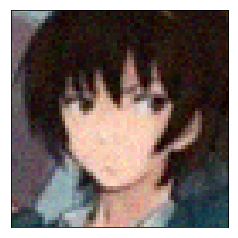

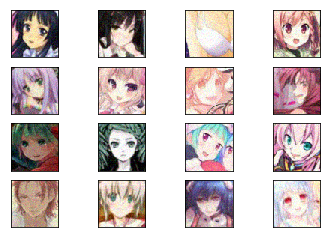

In [6]:
if __name__ == "__main__":
    file1 = '../faces/aa7fabda90b3a51124ef411a31483bf3-2.jpg'
    img1 = readImage(filename=file1, size=(64, 64), noiseStdev = 0.03)
    plt.imshow(img1.getAttr())
    plt.xticks([])
    plt.yticks([])
    
    directory = '../faces/'
    imgs = readImagesIn(directory=directory, size=(64, 64), noiseStdev=0.05)
    print(type(imgs))
    plotImages(imgs[:16], savePath = None)